In [3]:
import pandas as pd
listings_df=pd.read_csv('listings-2.csv', index_col=None)

In [30]:
import numpy as np

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
calendar_df=pd.read_csv('calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,2515,2019-07-05,t,$89.00
1,2515,2019-07-04,t,$89.00
2,2515,2019-07-03,t,$89.00
3,2515,2019-07-02,t,$89.00
4,2515,2019-07-01,t,$89.00


In [7]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466710 entries, 0 to 17466709
Data columns (total 4 columns):
listing_id    int64
date          object
available     object
price         object
dtypes: int64(1), object(3)
memory usage: 533.0+ MB


In [8]:
reviews_df=pd.read_csv('reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


From 92 columns, we trim it down to important features. This is using domain knowledge, or educated guess, not feature selections.

In [23]:
ld = listings_df.loc[:,['name', 'summary', 'space', 'description', 
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'neighbourhood_group_cleansed', 'property_type', 'room_type', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    'amenities', 'price', 'cleaning_fee', 'extra_people','minimum_nights',
    'maximum_nights', 'instant_bookable',
    'cancellation_policy', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [24]:
ld.head()

,name,summary,space,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,...,maximum_nights,instant_bookable,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,96%,100%,f,Queen Anne,Apartment,...,365,f,moderate,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,98%,100%,t,Queen Anne,Apartment,...,90,f,strict,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,67%,100%,f,Queen Anne,House,...,30,f,strict,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,f,Queen Anne,Apartment,...,1125,f,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,100%,NaN,f,Queen Anne,House,...,1125,f,strict,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [25]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
name                            3818 non-null object
summary                         3641 non-null object
space                           3249 non-null object
description                     3818 non-null object
host_response_time              3295 non-null object
host_response_rate              3295 non-null object
host_acceptance_rate            3045 non-null object
host_is_superhost               3816 non-null object
neighbourhood_group_cleansed    3818 non-null object
property_type                   3817 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null int64
bathrooms                       3802 non-null float64
bedrooms                        3812 non-null float64
beds                            3817 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-nu

In [32]:
#Get lengths of description elements
ld.loc[:,'name_length'] = ld['name'].str.len()
ld.loc[:,'summary_length'] = ld['summary'].str.len()
ld.loc[:,'space_length'] = ld['space'].str.len()
ld.loc[:,'description_length'] = ld['description'].str.len()
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()
ld.loc[:,'name_length'].fillna(0, inplace=True)
ld.loc[:,'summary_length'].fillna(0, inplace=True)
ld.loc[:,'space_length'].fillna(0, inplace=True)
ld.loc[:,'description_length'].fillna(0, inplace=True)
ld.loc[:,'amenities_length'] = ld['amenities'].str.len()

#Drop original description variables
ld = ld.drop(['name', 'summary', 'space', 'description', 'amenities'], 1)

In [34]:
#Recode host_response_time to integers as it is a spectrum
ld['host_response_time'].replace('within an hour', 1, inplace=True)
ld['host_response_time'].replace('within a few hours', 2, inplace=True)
ld['host_response_time'].replace('within a day', 3, inplace=True)
ld['host_response_time'].replace('a few days or more', 4, inplace=True)

#Impute missing values using forward-fill method
ld['host_response_time'].fillna(method='ffill', inplace=True)

In [35]:
#Convert acceptance/response percentages to numbers
ld['host_acceptance_rate'] = ld['host_acceptance_rate'].replace('%','',regex=True).astype('float64')/100.00
ld['host_response_rate'] = ld['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00

#Impute missing values using forward-fill method
ld['host_response_rate'].fillna(method='ffill', inplace=True)
ld['host_acceptance_rate'].fillna(method='ffill', inplace=True)

In [38]:
#Change f/t values to binary 0/1
ld['host_is_superhost'].replace('t',1, inplace=True)
ld['host_is_superhost'].replace('f',0, inplace=True)
ld['instant_bookable'].replace('t',1, inplace=True)
ld['instant_bookable'].replace('f',0, inplace=True)

In [36]:
#Clean property_type category to 5 categories
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

ld['property_type'] = ld['property_type'].apply(recode)

In [37]:
#Clean bed_type to binary real bed or other
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

ld['bed_type'] = ld['bed_type'].apply(recode)

In [53]:
#Convert price, cleaning_fee, extra people to numbers
ld['price'] = ld['price'].astype('float64')

In [54]:
ld['cleaning_fee'] = ld['cleaning_fee'].str.replace('$', '')
ld['cleaning_fee'] = ld['cleaning_fee'].str.replace(',', '').astype('float64')

In [55]:
ld['extra_people'] = ld['extra_people'].str.replace('$', '')
ld['extra_people'] = ld['extra_people'].str.replace(',', '').astype('float64')

In [56]:
#Missing data for cleaning fee indicates a $0 cleaning fee
ld['cleaning_fee'].fillna(0, inplace=True)

#Can't be sure what a missing value for these so we'll fill na
ld['bathrooms'].fillna(method='ffill', inplace=True)
ld['bedrooms'].fillna(method='ffill', inplace=True)
ld['beds'].fillna(method='ffill', inplace=True)
ld['host_is_superhost'].fillna(method='ffill', inplace=True)

In [101]:
#Get rid of all records that don't have our outcome variable
ld = ld[ld['review_scores_value'].isnull() == 0]

In [102]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 3814
Data columns (total 31 columns):
host_response_time              3162 non-null float64
host_response_rate              3162 non-null float64
host_acceptance_rate            3162 non-null float64
host_is_superhost               3162 non-null float64
neighbourhood_group_cleansed    3162 non-null object
property_type                   3162 non-null object
room_type                       3162 non-null object
accommodates                    3162 non-null int64
bathrooms                       3162 non-null float64
bedrooms                        3162 non-null float64
beds                            3162 non-null float64
bed_type                        3162 non-null object
price                           3162 non-null float64
cleaning_fee                    3162 non-null float64
extra_people                    3162 non-null float64
minimum_nights                  3162 non-null int64
maximum_nights                  3162 

In [103]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

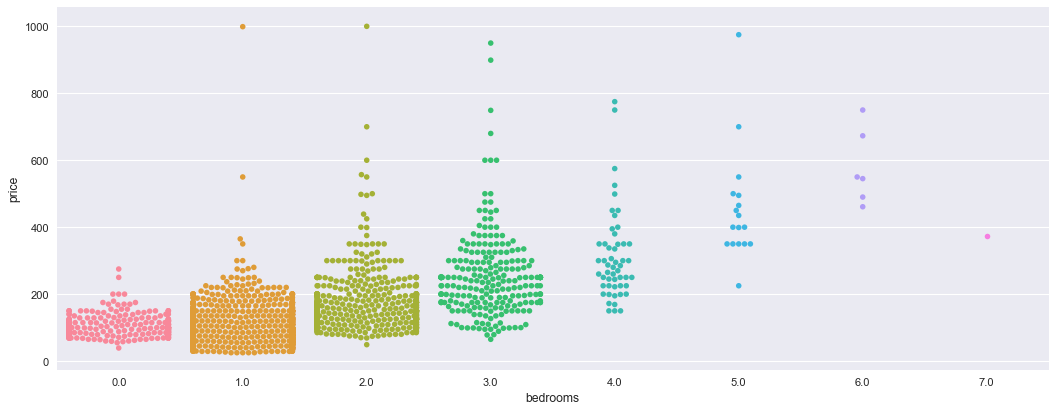

In [104]:
sns.set()
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='bedrooms', y='price', data=ld)
plt.show()

It is obvious that the more rooms there are the higher the price is. But it is also interesting to see:
1. 7-bedroom listing is price lower than most 6-bedroom listing. Is that an outlier?
2. 1-bedroom listing starts at a lower point than 0-bedroom listing.
3. Listings priced above $800 can be outliers?

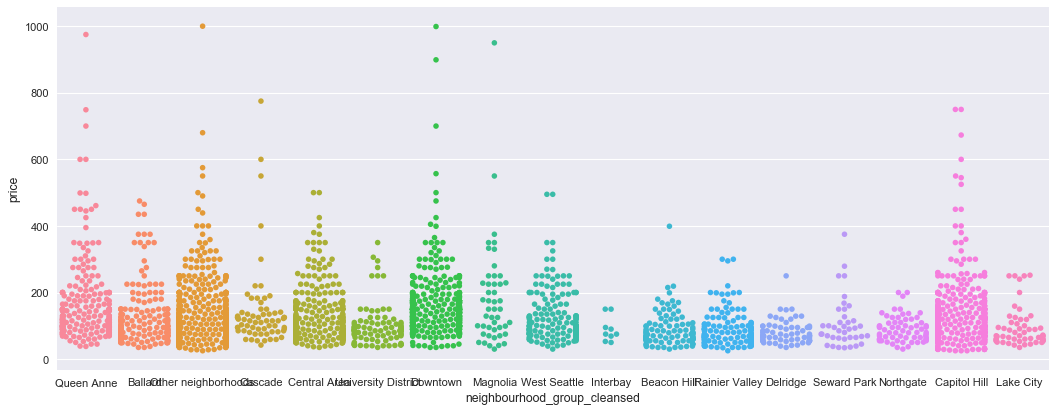

In [105]:
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='neighbourhood_group_cleansed', y='price', data=ld)
plt.show()

Listings in Queen Anne, Central, Downtown, West Seattle and Capital Hill are the higher priced neighborhood.

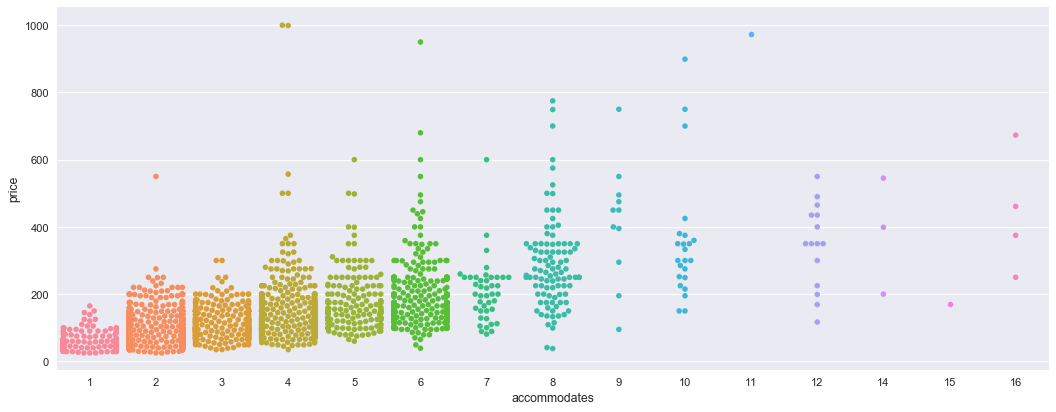

In [106]:
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
_=sns.swarmplot(x='accommodates', y='price', data=ld)
plt.show()

Similarly to number of bedrooms, the more a listing can accommodates, the higher the price. There are, however, certain things to notice:
1. Listings over 9 people aren't priced higher, but tends to be lower than listings for 8. It seems 8 is the threshold.
2. Evens seem be priced higher than odds.

Let's see how dynamic is the airbnb scene in Seattle. 

First we can check the highest listings per host.


In [107]:
listings_df['host_total_listings_count'].max()

502.0

One host with 502 listings. This means that hosts are using airbnb as their business platforms in Seattle. 
We would be expecting a dynamic scene.

In [110]:
#Convert price to numbers
calendar_df['price'] = calendar_df['price'].astype('float64')

In [111]:
gb_df=calendar_df.groupby(['listing_id'])
gb_df.head()

,listing_id,date,available,price
0,2515,2019-07-05,t,89.0
1,2515,2019-07-04,t,89.0
2,2515,2019-07-03,t,89.0
3,2515,2019-07-02,t,89.0
4,2515,2019-07-01,t,89.0
365,2539,2019-07-04,t,149.0
366,2539,2019-07-03,t,149.0
367,2539,2019-07-02,t,149.0
368,2539,2019-07-01,t,149.0
369,2539,2019-06-30,t,149.0


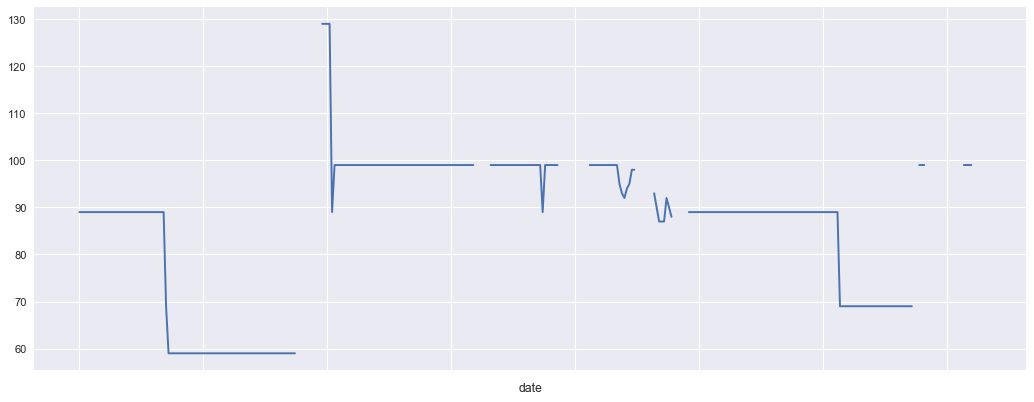

In [112]:
first_calendar=calendar_df[calendar_df['listing_id']==2515]
ts=pd.Series(first_calendar['price'].values, index=first_calendar['date'])
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ts.plot()

Christmas has a boost in price to 130 then down to 60, gradually back up to 90 for April, May, June and July

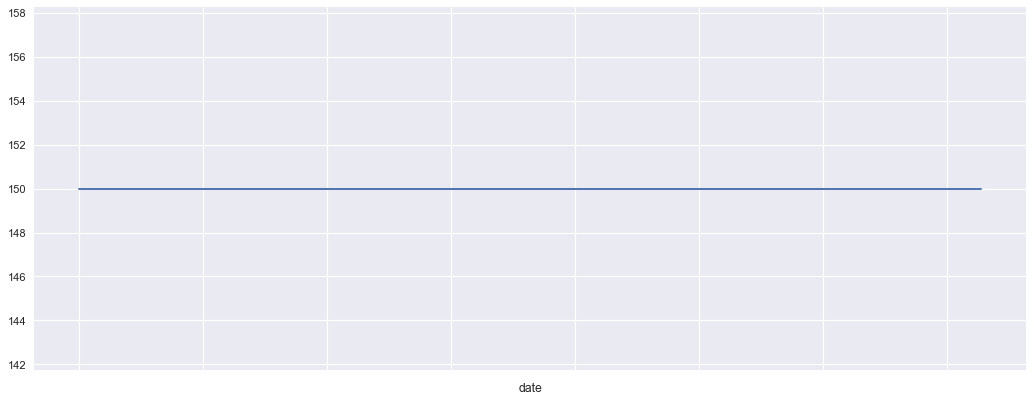

In [113]:
second_calendar=calendar_df[calendar_df['listing_id']==3647]
ts=pd.Series(second_calendar['price'].values, index=second_calendar['date'])
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ts.plot()

No dynamic pricing in this listing

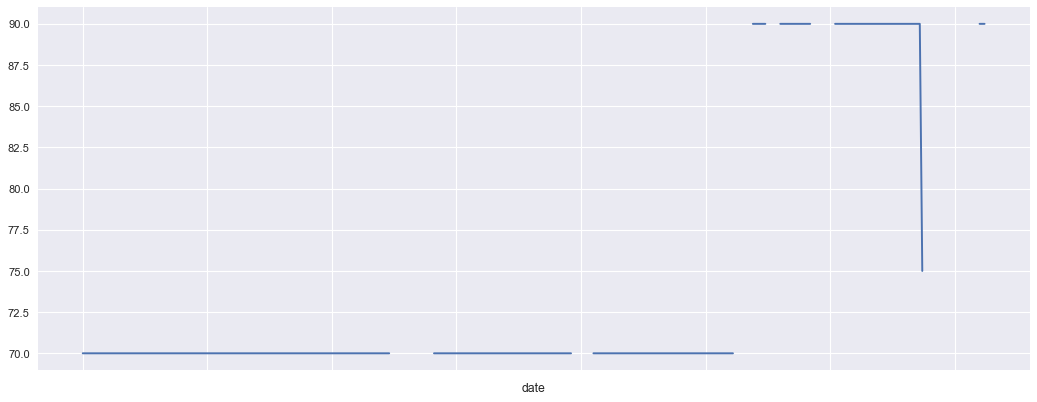

In [114]:
third_calendar=calendar_df[calendar_df['listing_id']==3330]
ts=pd.Series(third_calendar['price'].values, index=third_calendar['date'])
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ts.plot()

It looks like this listing didn't do well at 90, 
hence the decrease in price to 70 for the rest of the time.

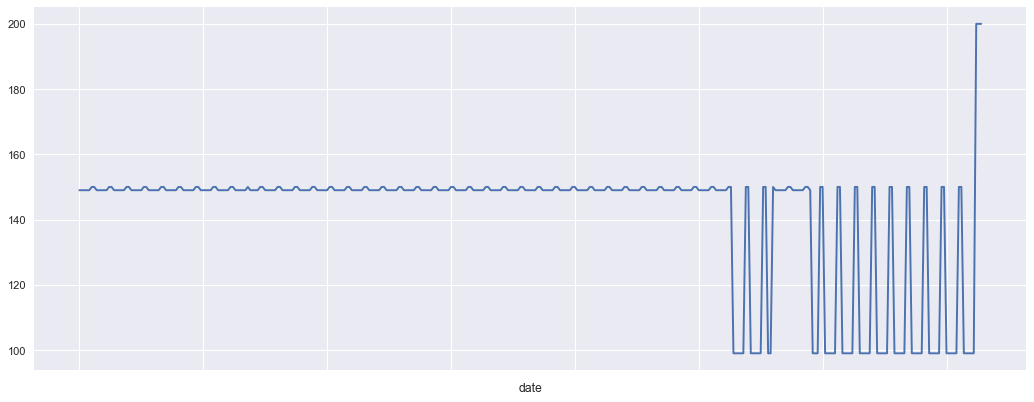

In [115]:
another_calendar=calendar_df[calendar_df['listing_id']==2539]
ts=pd.Series(another_calendar['price'].values, index=another_calendar['date'])
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
ts.plot()

This looks like they have set some weekend price increase.

review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642224
review_scores_accuracy         0.621215
review_scores_communication    0.542879
review_scores_checkin          0.521786
review_scores_location         0.368323
host_is_superhost              0.241798
amenities_length               0.153497
host_response_rate             0.130416
summary_length                 0.065192
price                          0.054834
description_length             0.047434
bathrooms                      0.045106
bedrooms                       0.023555
instant_bookable               0.006286
minimum_nights                 0.001400
beds                          -0.001346
cleaning_fee                  -0.004400
name_length                   -0.006897
accommodates                  -0.014718
host_acceptance_rate          -0.014725
space_length                  -0.021173
maximum_nights                -0.031159
extra_people                  -0.035031


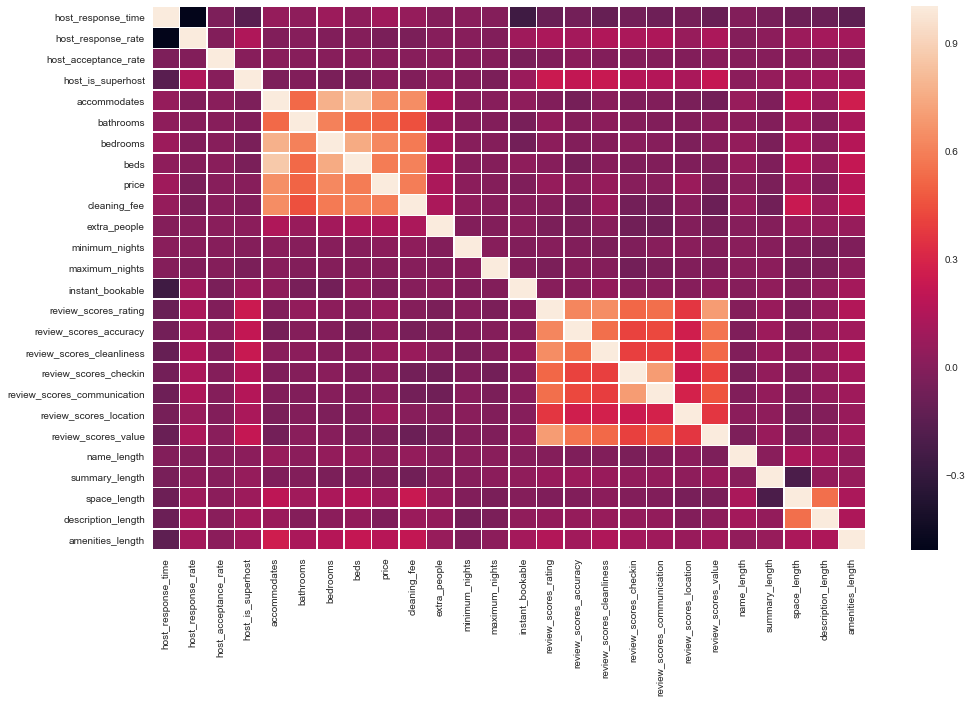

In [116]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = ld.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['review_scores_rating'].sort_values(ascending=False)

In [117]:
#Remove all ratings but our overall review_scores_value outcome
model_data = ld.loc[:,('host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'cancellation_policy',
 'review_scores_value',
 'name_length',
 'summary_length',
 'space_length',
 'description_length',
 'amenities_length')]

In [118]:
#Get dummy variables for our 5 categorical fields
model_data = pd.get_dummies(model_data, columns=['neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'])

In [119]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 3814
Data columns (total 48 columns):
host_response_time                                  3162 non-null float64
host_response_rate                                  3162 non-null float64
host_acceptance_rate                                3162 non-null float64
host_is_superhost                                   3162 non-null float64
accommodates                                        3162 non-null int64
bathrooms                                           3162 non-null float64
bedrooms                                            3162 non-null float64
beds                                                3162 non-null float64
price                                               3162 non-null float64
cleaning_fee                                        3162 non-null float64
minimum_nights                                      3162 non-null int64
maximum_nights                                      3162 non-null int64
instant_boo

In [120]:
#Create Training / Test splits
from sklearn.model_selection import train_test_split

target_name = 'review_scores_value'
X = model_data.drop('review_scores_value', axis=1)
y=model_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [121]:
#Let's use the basic OLS regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

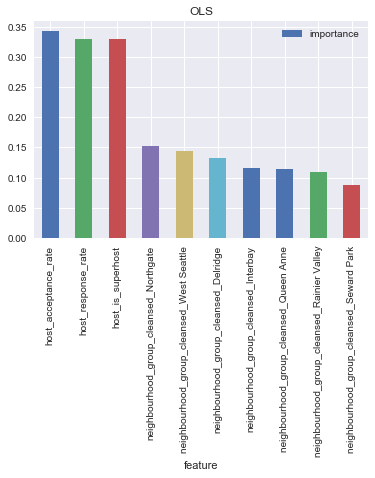

In [142]:
#What are the features that have the most weight?
ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10].plot(x='feature', y='importance', kind='bar', title='OLS')

In [123]:
#Get OLS mean squared error on test dataset 
from sklearn import metrics
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse

0.6977697963551963

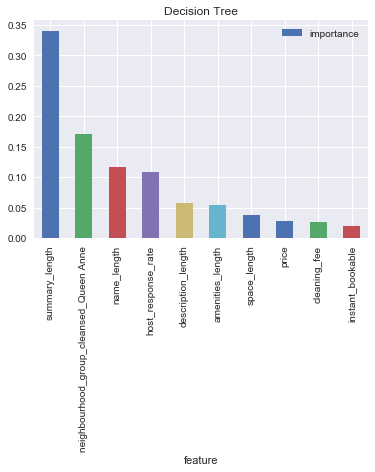

In [143]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Make the decision tree
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
dtree = dtree.fit(X_train,y_train)

#Look at outputs
importances = dtree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar', title='Decision Tree')

In [125]:
#Get Decision Tree mean squared error on test dataset
dtree_y_predict = dtree.predict(X_test)
dtree_mse = np.sqrt(metrics.mean_squared_error(y_test, dtree_y_predict))
dtree_mse

1.8637822325921867

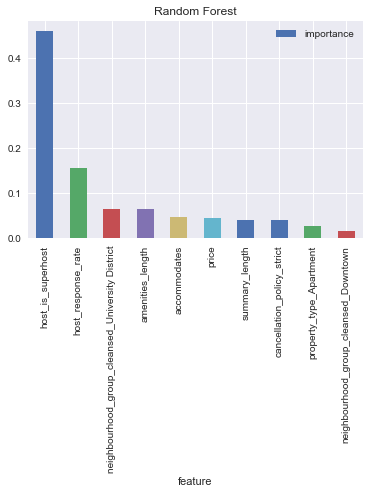

In [144]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar', title='Random Forest')

In [140]:
#Get Random Forest mean squared error on test dataset
rf_y_predict = rf.predict(X_test)
rf_mse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_predict))
rf_mse

0.7058711712461408

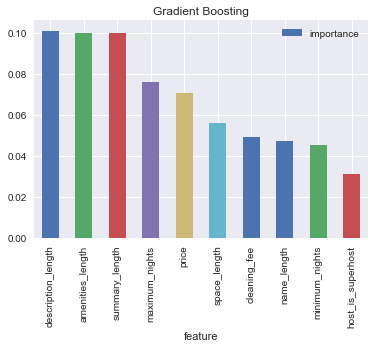

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=3, random_state=0)
gb.fit(X_train, y_train)
gb_importances = gb.feature_importances_
gb_result = pd.DataFrame({'feature': feat_names, 'importance': gb_importances})
gb_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar', title='Gradient Boosting')

In [141]:
#Get Gradient Boosting mean squared error on test dataset
gb_y_predict = gb.predict(X_test)
gb_mse = np.sqrt(metrics.mean_squared_error(y_test, gb_y_predict))
gb_mse

0.8669365301845464